# **3 LAB**

# Аналогично первой лабораторной работе, удаляем повторения и коррелирующие признаки

In [1]:
import pandas as pd # для работы с данными: объектами, признаками, результатами
import numpy as np # для работы с матрицами и многомерными массивами
import seaborn as sns # визуализация
import matplotlib.pyplot as plt # визуализация

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('winequality-red.csv') # читаем данные сета из comma-separated file

In [4]:
data.head(15) # вывод некоторого количества строк данных 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
print(data.shape) # размер датасета всего (строки, столбцы)

data.drop_duplicates(inplace=True) # удалене повторяющихся строк (inplace - удалить дубликаты в самом образце или вернуть копию с удаленными)
 # data.drop([ '__' ], axis = 'columns') - удалениие признаков, если не нужны
data.shape # были удалены 240 повторяющихся строк

(1599, 12)


(1359, 12)

In [6]:
corr = data.corr().abs()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.255124,0.667437,0.111025,0.085886,0.140580,0.103777,0.670195,0.686685,0.190269,0.061596,0.119024
volatile acidity,0.255124,1.000000,0.551248,0.002449,0.055154,0.020945,0.071701,0.023943,0.247111,0.256948,0.197812,0.395214
citric acid,0.667437,0.551248,1.000000,0.143892,0.210195,0.048004,0.047358,0.357962,0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,0.083143,0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,0.270893,0.394557,0.223824,0.130988
free sulfur dioxide,0.140580,0.020945,0.048004,0.160527,0.000749,1.000000,0.667246,0.018071,0.056631,0.054126,0.080125,0.050463
total sulfur dioxide,0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,0.079257,0.035291,0.217829,0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,0.018071,0.078141,1.000000,0.355617,0.146036,0.504995,0.184252
pH,0.686685,0.247111,0.550310,0.083143,0.270893,0.056631,0.079257,0.355617,1.000000,0.214134,0.213418,0.055245
sulphates,0.190269,0.256948,0.326062,0.011837,0.394557,0.054126,0.035291,0.146036,0.214134,1.000000,0.091621,0.248835


In [7]:
ncorr = corr.copy()
# массив коррелирующих признаков для удаления
toDel = []

for row in ncorr.index:
    for column in ncorr[row].index: 
        if ncorr[row][column] >= 0.65 and ncorr[row][column] != 1: 
            if not row in toDel:
              toDel.append(column)
            ncorr[row][column] = '*'
        else:
            ncorr[row][column] = ' '
ncorr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,*,,,,,*,*,,,
volatile acidity,,,,,,,,,,,,
citric acid,*,,,,,,,,,,,
residual sugar,,,,,,,,,,,,
chlorides,,,,,,,,,,,,
free sulfur dioxide,,,,,,,*,,,,,
total sulfur dioxide,,,,,,*,,,,,,
density,*,,,,,,,,,,,
pH,*,,,,,,,,,,,
sulphates,,,,,,,,,,,,


In [8]:
toDel

['citric acid', 'density', 'pH', 'total sulfur dioxide']

In [9]:
# датасет без коррелирующих признаков
cleared = data.drop(['citric acid', 'density', 'pH', 'free sulfur dioxide'], axis = 1) # axis = 1 - удаляем столбцы
cleared.head(15)

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,60.0,0.58,9.8,6
5,7.4,0.660,1.8,0.075,40.0,0.56,9.4,5
6,7.9,0.600,1.6,0.069,59.0,0.46,9.4,5
7,7.3,0.650,1.2,0.065,21.0,0.47,10.0,7
8,7.8,0.580,2.0,0.073,18.0,0.57,9.5,7
9,7.5,0.500,6.1,0.071,102.0,0.80,10.5,5
10,6.7,0.580,1.8,0.097,65.0,0.54,9.2,5


In [10]:
data = cleared
data.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,6
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,5


# -------------------------------------------------------------------

In [11]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
data['quality'] = pd.cut(x = data['quality'], bins = bins, labels = labels)
# изменение целевой характеристики - качество
# раньше мы решали задачу классификации по 6 классам
# превращение целевой характеристики к бинарному виду (качество либо 'bad' либо 'good' порог разделения 6.5)

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
# привили значение целевой характеристики к численному виду (0/1 0 - плохое качество, 1 - хорошее)
data['quality'] = labelencoder_y.fit_transform(data['quality'])
data['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

In [13]:
# разделяем датасет, выделяем таргет пизнаки (которые стремимся научиться определять) и остальные
target = data[data.columns[-1]].values # таргетированный признак (качество вина)
train_matrix = data[data.columns[:-1]].values # признаки

In [14]:
target

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
train_matrix

array([[ 7.4  ,  0.7  ,  1.9  , ..., 34.   ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  2.6  , ..., 67.   ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  2.3  , ..., 54.   ,  0.65 ,  9.8  ],
       ...,
       [ 5.9  ,  0.55 ,  2.2  , ..., 51.   ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  2.   , ..., 44.   ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  3.6  , ..., 42.   ,  0.66 , 11.   ]])

In [16]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0) 
# Класс для выполнения случайной передискретизации. Нормализация классов путем случайного отбора выборок с заменой. 
X_train_res, y_train_res = over_samp.fit_resample(train_matrix, target)
X_train_res.shape, y_train_res.shape
# после обработки тестовая выборка стала состоять из 3462 строк


#add-l

((2350, 7), (2350,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(train_matrix, target, test_size = 0.2, random_state = 42)

In [19]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (1087, 7)
Shape of x_test:  (272, 7)
Shape of y_train:  (1087,)
Shape of y_test (272,)


In [20]:
from sklearn.preprocessing import StandardScaler 
# стандартизация значений
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [21]:
x_train_scaled

array([[ 0.35162311, -0.82832312, -0.23844033, ..., -0.56629785,
         0.51985077,  1.98424001],
       [-0.98154785,  0.96589124,  0.05458922, ..., -0.59634157,
        -0.45848943, -0.2158671 ],
       [-0.86561994,  0.18092246, -0.60472726, ..., -0.35599181,
        -0.17074231, -0.39920936],
       ...,
       [-0.86561994, -0.32370033, -0.23844033, ..., -0.26586066,
        -0.05564346, -0.76589387],
       [ 0.35162311, -1.16473831, -0.3849551 , ..., -0.83669132,
        -0.6311377 , -0.03252484],
       [ 0.46755102, -1.05259991, -0.53146987, ..., -0.86673504,
        -0.6311377 ,  0.88418646]])

In [22]:
# признаки нетаргетные по порядку

col = ['fixed acidity', 	'volatile acidity', 	'residual sugar', 	'chlorides' ,	'total sulfur dioxide',	'sulphates', 	'alcohol']

In [23]:
def plot_features_coefs(x, y):
  fig = plt.figure(figsize=(15, 15))
  ax = fig.add_subplot(111)
  ax.bar(x, height=y, label='Вклад признаков')
  ax.tick_params(axis='x', which='major', rotation=45)
  plt.legend()
  plt.show()

C = 1e-05, точность = 0.875
C = 0.0001, точность = 0.875
C = 0.001, точность = 0.875
C = 0.01, точность = 0.875
C = 0.1, точность = 0.9007352941176471
C = 1, точность = 0.8970588235294118
C = 10, точность = 0.8970588235294118
C = 100, точность = 0.8970588235294118
C = 1000, точность = 0.8970588235294118
C = 10000, точность = 0.8970588235294118
C = 100000, точность = 0.8970588235294118
0.1  - max C


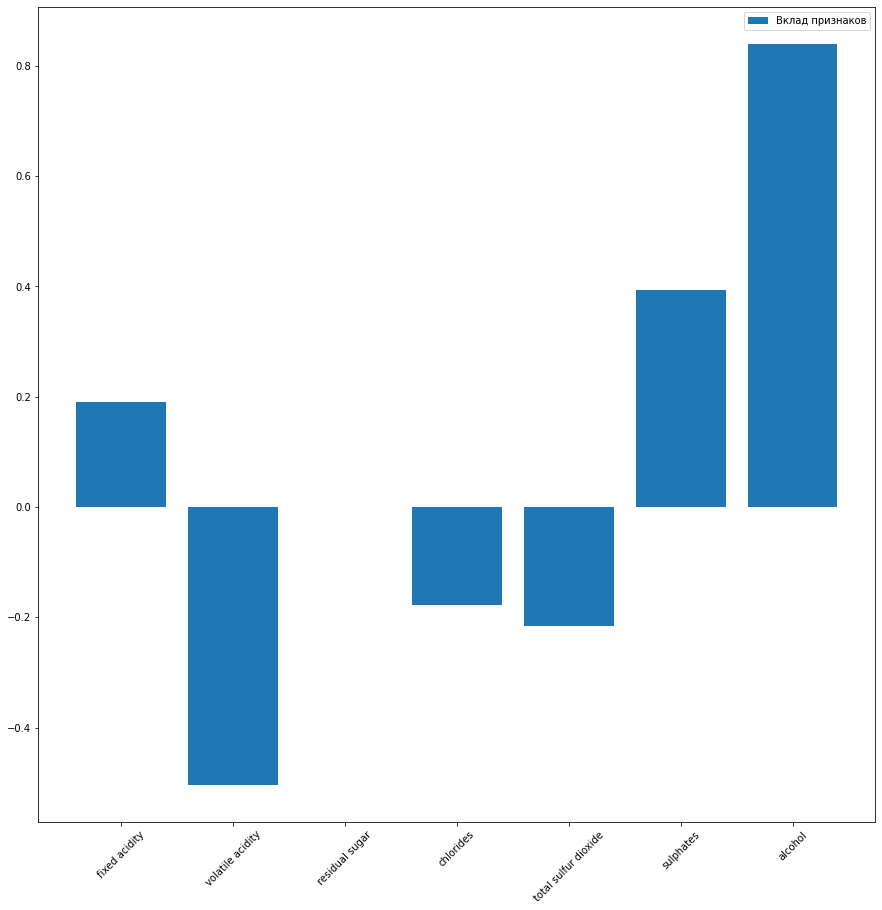

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# логистическая регрессия с регуляризацией L1
# список параметрок регуляризации
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
max_r=0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(x_train_scaled,y_train)
  y_pred = lr.predict(x_test_scaled)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test,y_pred)
  if lra>max_r:
    max_c=cList[i]
    max_r=lra
  print(f"C = {cList[i]}, точность = {lra}")

print(max_c, ' - max C')
lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(x_train_scaled, y_train)
plot_features_coefs(col, lr.coef_[0])

C = 1e-05, точность = 0.8860294117647058
C = 0.0001, точность = 0.8897058823529411
C = 0.001, точность = 0.9044117647058824
C = 0.01, точность = 0.8970588235294118
C = 0.1, точность = 0.9007352941176471
C = 1, точность = 0.8933823529411765
C = 10, точность = 0.8970588235294118
C = 100, точность = 0.8970588235294118
C = 1000, точность = 0.8970588235294118
C = 10000, точность = 0.8970588235294118
C = 100000, точность = 0.8970588235294118
0.001  - max C


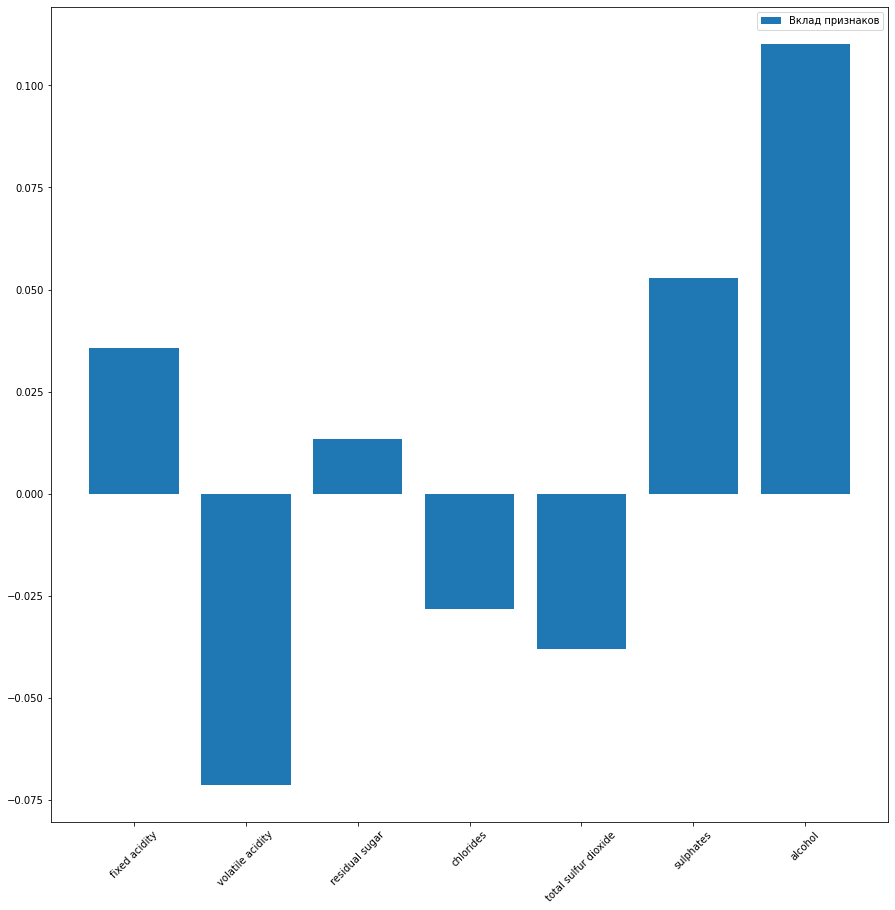

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
# логистическая регрессия с регуляризацией L2
# список параметрок регуляризации
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
max_r=0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l2', solver='liblinear')
  lr.fit(x_train_scaled,y_train)
  y_pred = lr.predict(x_test_scaled)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test,y_pred)
  if lra>max_r:
    max_c=cList[i]
    max_r=lra
  print(f"C = {cList[i]}, точность = {lra}")

print(max_c, ' - max C')
lr = LogisticRegression(C = max_c,penalty='l2', solver='liblinear')
lr.fit(x_train_scaled, y_train)
plot_features_coefs(col, lr.coef_[0])

при L1-регуляризации доля правильных ответов наибольшая

Отберём признаки для для метода прижайших соседей, это будут признаки: fixed acidity,	volatile acidity,	chlorides, total sulfur dioxide, pH, sulphates,	alcohol.

In [26]:
data = cleared

In [27]:
newData = data.copy()

In [28]:
newData.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,0
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,0
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,0
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,0
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,0


In [29]:
newData = newData.drop(columns = ['residual sugar' ])

In [30]:
newData.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.56,9.4,0
1,7.8,0.88,0.098,67.0,0.68,9.8,0
2,7.8,0.76,0.092,54.0,0.65,9.8,0
3,11.2,0.28,0.075,60.0,0.58,9.8,0
5,7.4,0.66,0.075,40.0,0.56,9.4,0


In [31]:
x_lr3 = newData.drop(columns = ['quality']) #удаления целевого столбца
y_lr3 = newData.quality

In [32]:
x_train_lr3, x_test_lr3, y_train_lr3, y_test_lr3 = train_test_split(x_lr3, y_lr3, test_size=0.2, random_state = 42)

In [33]:
from sklearn.preprocessing import StandardScaler 
# стандартизация значений
sc = StandardScaler()
x_train_lr3_scaled = sc.fit_transform(x_train_lr3)
x_test_lr3_scaled = sc.transform(x_test_lr3)

In [34]:
x_train_lr3_scaled

array([[ 0.35162311, -0.82832312, -0.41160622, -0.56629785,  0.51985077,
         1.98424001],
       [-0.98154785,  0.96589124,  0.31279969, -0.59634157, -0.45848943,
        -0.2158671 ],
       [-0.86561994,  0.18092246, -0.10659321, -0.35599181, -0.17074231,
        -0.39920936],
       ...,
       [-0.86561994, -0.32370033, -0.48785948, -0.26586066, -0.05564346,
        -0.76589387],
       [ 0.35162311, -1.16473831, -0.03033996, -0.83669132, -0.6311377 ,
        -0.03252484],
       [ 0.46755102, -1.05259991, -0.60223936, -0.86673504, -0.6311377 ,
         0.88418646]])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_lr3=0
i_lr3=0
for i in range (1,20):
  clf = KNeighborsClassifier(i)
  clf.fit(x_train_lr3_scaled, y_train_lr3)
  if knn_lr3<clf.score(x_test_lr3_scaled, y_test_lr3):
    i_lr3=i
    knn_lr3=clf.score(x_test_lr3_scaled, y_test_lr3)
clf = KNeighborsClassifier(i_lr3)
clf.fit(x_train_lr3_scaled, y_train_lr3)
sc = clf.score(x_test_lr3_scaled, y_test_lr3)

print(sc)
print(i_lr3)

0.9191176470588235
11


In [37]:
coll = ['fixed acidity' ,	'volatile acidity', 	'chlorides' ,	'total sulfur dioxide', 	'sulphates', 	'alcohol']

C = 1e-05, точность = 0.875
C = 0.0001, точность = 0.875
C = 0.001, точность = 0.875
C = 0.01, точность = 0.875
C = 0.1, точность = 0.9007352941176471
C = 1, точность = 0.8897058823529411
C = 10, точность = 0.8897058823529411
C = 100, точность = 0.8897058823529411
C = 1000, точность = 0.8897058823529411
C = 10000, точность = 0.8897058823529411
C = 100000, точность = 0.8897058823529411
0.1  - max C


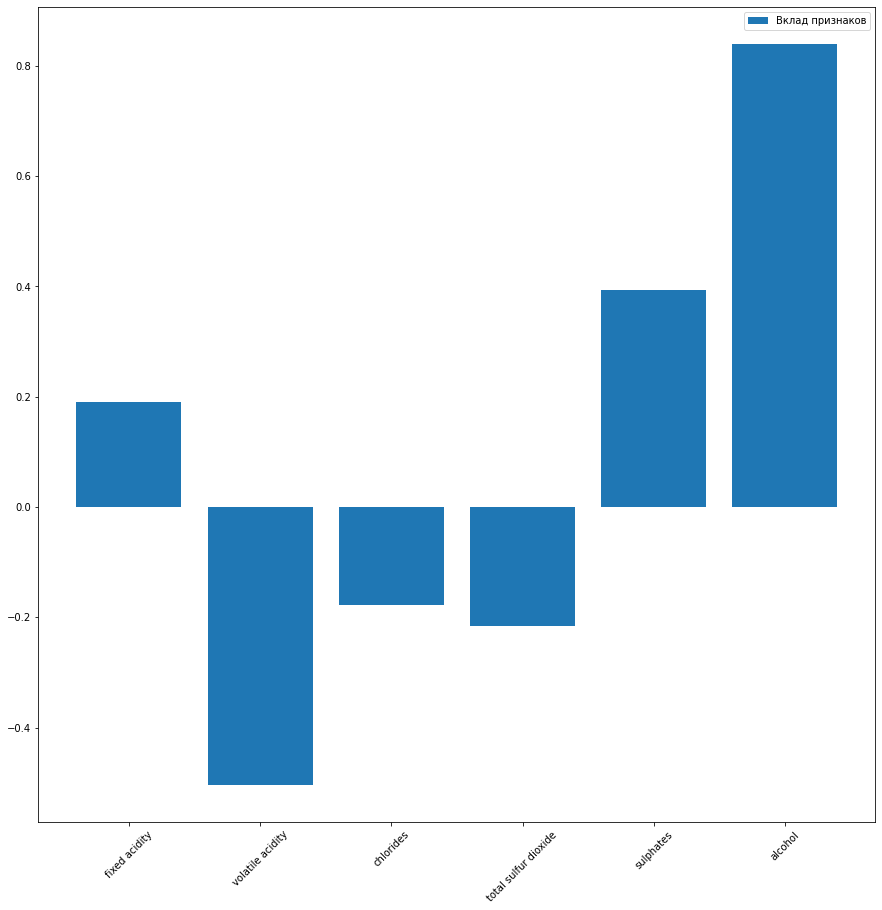

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
max_r = 0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(x_train_lr3_scaled, y_train_lr3)
  y_pred_lr3 = lr.predict(x_test_lr3_scaled)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test_lr3,y_pred_lr3)
  if lra>max_r:
    max_c=cList[i]
    max_r=lra
  print(f"C = {cList[i]}, точность = {lra}")

print(max_c, ' - max C')
lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(x_train_lr3_scaled, y_train_lr3)
plot_features_coefs(coll, lr.coef_[0])

# **------------------------------------------------**
# С удалением малозначимых

In [39]:
newData = data.copy()

In [40]:
newData.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,0
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,0
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,0
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,0
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,0


In [41]:
newData = newData.drop(columns = ['fixed acidity' 	,'residual sugar' ,	'chlorides' ]) # ,	'total sulfur dioxide'

In [42]:
newData.head()

,volatile acidity,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,34.0,0.56,9.4,0
1,0.88,67.0,0.68,9.8,0
2,0.76,54.0,0.65,9.8,0
3,0.28,60.0,0.58,9.8,0
5,0.66,40.0,0.56,9.4,0


In [43]:
x_lr3 = newData.drop(columns = ['quality']) #удаления целевого столбца
y_lr3 = newData.quality

In [44]:
x_train_lr3, x_test_lr3, y_train_lr3, y_test_lr3 = train_test_split(x_lr3, y_lr3, test_size=0.2, random_state = 42)

In [45]:
from sklearn.preprocessing import StandardScaler 
# стандартизация значений
sc = StandardScaler()
x_train_lr3_scaled = sc.fit_transform(x_train_lr3)
x_test_lr3_scaled = sc.transform(x_test_lr3)

In [46]:
x_train_lr3_scaled

array([[-0.82832312, -0.56629785,  0.51985077,  1.98424001],
       [ 0.96589124, -0.59634157, -0.45848943, -0.2158671 ],
       [ 0.18092246, -0.35599181, -0.17074231, -0.39920936],
       ...,
       [-0.32370033, -0.26586066, -0.05564346, -0.76589387],
       [-1.16473831, -0.83669132, -0.6311377 , -0.03252484],
       [-1.05259991, -0.86673504, -0.6311377 ,  0.88418646]])

In [47]:
knn_lr3=0
i_lr3=0
for i in range (1,20):
  clf = KNeighborsClassifier(i)
  clf.fit(x_train_lr3_scaled, y_train_lr3)
  if knn_lr3<clf.score(x_test_lr3_scaled, y_test_lr3):
    i_lr3=i
    knn_lr3=clf.score(x_test_lr3_scaled, y_test_lr3)
clf = KNeighborsClassifier(i_lr3)
clf.fit(x_train_lr3_scaled, y_train_lr3)
sc = clf.score(x_test_lr3_scaled, y_test_lr3)

print(sc)
print(i_lr3)

0.9191176470588235
11


In [48]:
coll = ['volatile acidity' ,	'total sulfur dioxide',	'sulphates' ,	'alcohol' 	]

C = 1e-05, точность = 0.875
C = 0.0001, точность = 0.875
C = 0.001, точность = 0.875
C = 0.01, точность = 0.875
C = 0.1, точность = 0.8897058823529411
C = 1, точность = 0.9007352941176471
C = 10, точность = 0.9007352941176471
C = 100, точность = 0.9007352941176471
C = 1000, точность = 0.9007352941176471
C = 10000, точность = 0.9007352941176471
C = 100000, точность = 0.9007352941176471
1  - max C


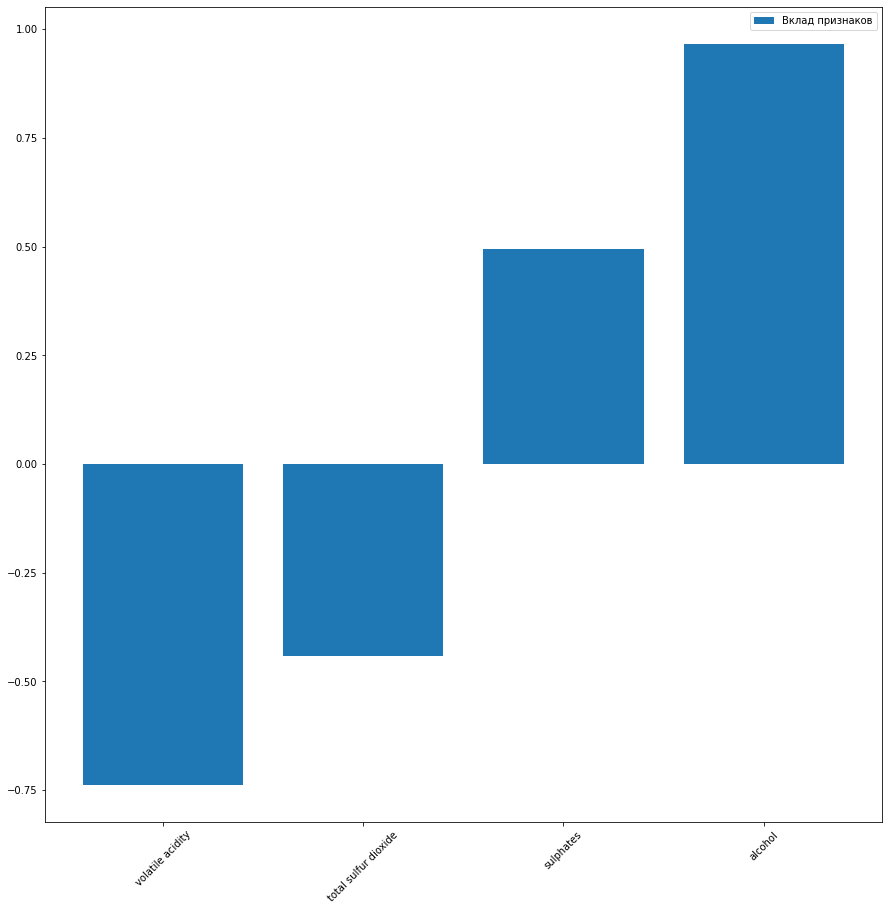

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
max_r = 0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(x_train_lr3_scaled, y_train_lr3)
  y_pred_lr3 = lr.predict(x_test_lr3_scaled)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test_lr3,y_pred_lr3)
  if lra>max_r:
    max_c=cList[i]
    max_r=lra
  print(f"C = {cList[i]}, точность = {lra}")

print(max_c, ' - max C')
lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(x_train_lr3_scaled, y_train_lr3)
plot_features_coefs(coll, lr.coef_[0])

# **------------------------------------------------**
# С удалением малозначимых

In [59]:
newData = data.copy()

In [60]:
newData.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.56,9.4,0
1,7.8,0.88,2.6,0.098,67.0,0.68,9.8,0
2,7.8,0.76,2.3,0.092,54.0,0.65,9.8,0
3,11.2,0.28,1.9,0.075,60.0,0.58,9.8,0
5,7.4,0.66,1.8,0.075,40.0,0.56,9.4,0


In [61]:
newData = newData.drop(columns = ['fixed acidity'	,'residual sugar' 	,'chlorides' 	,'total sulfur dioxide' 	]) # ,	'total sulfur dioxide'

In [62]:
newData.head()

,volatile acidity,sulphates,alcohol,quality
0,0.70,0.56,9.4,0
1,0.88,0.68,9.8,0
2,0.76,0.65,9.8,0
3,0.28,0.58,9.8,0
5,0.66,0.56,9.4,0


In [63]:
x_lr3 = newData.drop(columns = ['quality']) #удаления целевого столбца
y_lr3 = newData.quality

In [64]:
x_train_lr3, x_test_lr3, y_train_lr3, y_test_lr3 = train_test_split(x_lr3, y_lr3, test_size=0.2, random_state = 42)

In [65]:
from sklearn.preprocessing import StandardScaler 
# стандартизация значений
sc = StandardScaler()
x_train_lr3_scaled = sc.fit_transform(x_train_lr3)
x_test_lr3_scaled = sc.transform(x_test_lr3)

In [66]:
x_train_lr3_scaled

array([[-0.82832312,  0.51985077,  1.98424001],
       [ 0.96589124, -0.45848943, -0.2158671 ],
       [ 0.18092246, -0.17074231, -0.39920936],
       ...,
       [-0.32370033, -0.05564346, -0.76589387],
       [-1.16473831, -0.6311377 , -0.03252484],
       [-1.05259991, -0.6311377 ,  0.88418646]])

In [67]:
knn_lr3=0
i_lr3=0
for i in range (1,20):
  clf = KNeighborsClassifier(i)
  clf.fit(x_train_lr3_scaled, y_train_lr3)
  if knn_lr3<clf.score(x_test_lr3_scaled, y_test_lr3):
    i_lr3=i
    knn_lr3=clf.score(x_test_lr3_scaled, y_test_lr3)
clf = KNeighborsClassifier(i_lr3)
clf.fit(x_train_lr3_scaled, y_train_lr3)
sc = clf.score(x_test_lr3_scaled, y_test_lr3)

print(sc)
print(i_lr3)

0.9007352941176471
15


In [68]:
coll = ['volatile acidity' ,	'sulphates' ,	'alcohol' 	]

C = 1e-05, точность = 0.875
C = 0.0001, точность = 0.875
C = 0.001, точность = 0.875
C = 0.01, точность = 0.875
C = 0.1, точность = 0.8933823529411765
C = 1, точность = 0.8897058823529411
C = 10, точность = 0.8860294117647058
C = 100, точность = 0.8860294117647058
C = 1000, точность = 0.8860294117647058
C = 10000, точность = 0.8860294117647058
C = 100000, точность = 0.8860294117647058
0.1  - max C


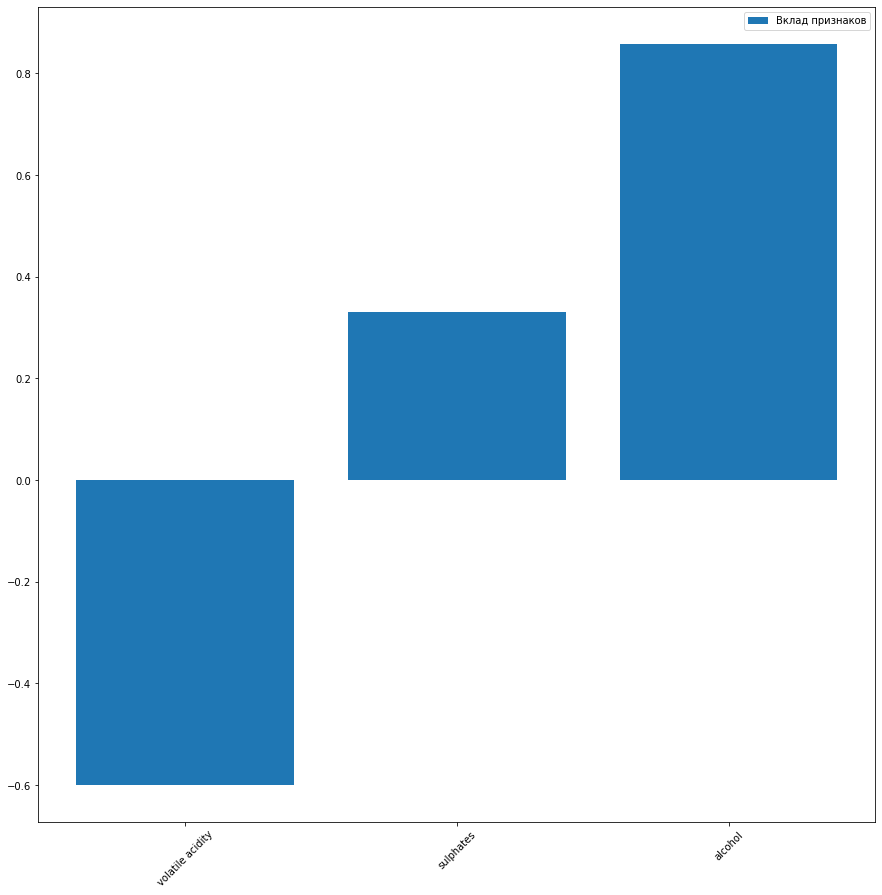

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
cList = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]
max_c=0
max_r = 0
for i in range(0, len(cList)):
  lr = LogisticRegression(C = cList[i],penalty='l1', solver='liblinear')
  lr.fit(x_train_lr3_scaled, y_train_lr3)
  y_pred_lr3 = lr.predict(x_test_lr3_scaled)
  
  #проверяем accuracy - точность наших выводов
  lra = accuracy_score(y_test_lr3,y_pred_lr3)
  if lra>max_r:
    max_c=cList[i]
    max_r=lra
  print(f"C = {cList[i]}, точность = {lra}")

print(max_c, ' - max C')
lr = LogisticRegression(C = max_c,penalty='l1', solver='liblinear')
lr.fit(x_train_lr3_scaled, y_train_lr3)
plot_features_coefs(coll, lr.coef_[0])